In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/All the Intermediate Colleges in Pakistan.csv")

In [ ]:
df.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [ ]:
df.isnull().sum()

,0
Name,0
Location,4
Study Program,0
Sector,529
Affiliation,1475
Rating,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
total_colleges = df['Name'].count()
print(total_colleges)

1630


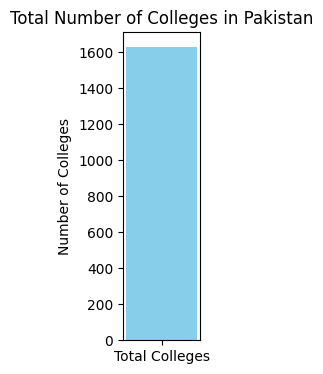

In [ ]:
plt.figure(figsize=(1, 4))  # Adjust figure size if needed
plt.bar(['Total Colleges'], [total_colleges], color='skyblue')
plt.title('Total Number of Colleges in Pakistan')
plt.ylabel('Number of Colleges')
plt.show()

In [ ]:
city_counts = df['Location'].value_counts().nlargest(5)

In [ ]:
city_counts

,count
Location,
Chakwal,11
Bhakkar,5
Bhimber,5
"Steel Town, Karachi",3
Khanewal,3


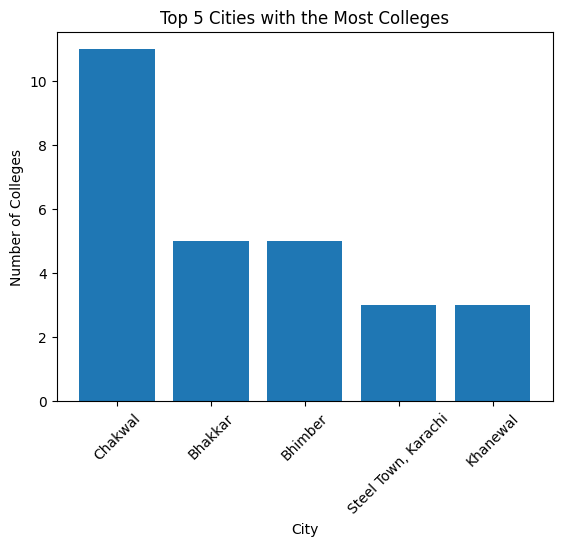

In [ ]:
plt.bar(city_counts.index, city_counts.values)
plt.title('Top 5 Cities with the Most Colleges')
plt.xlabel('City')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=45)
plt.show()

In [ ]:
total_public_colleges = df[df['Sector'] == 'Public']['Name'].count()
total_private_colleges = df[df['Sector'] == 'Private']['Name'].count()

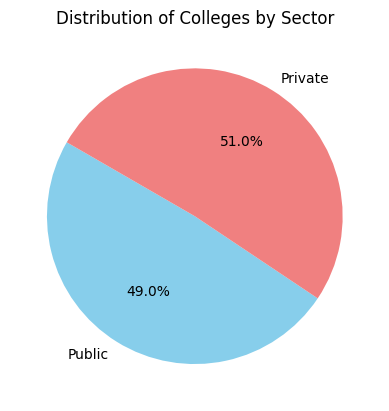

In [ ]:
plt.pie([total_public_colleges, total_private_colleges],
        labels=['Public', 'Private'],
        autopct='%1.1f%%',
        startangle=150,
        colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Colleges by Sector')
plt.show()

In [ ]:
sectorwise_top5 = df.groupby('Sector')['Rating'].value_counts().groupby(level=0, group_keys=False).nlargest(5)

In [ ]:
sectorwise_top5

Sector   Rating
Private  0*        373
         5*         63
         4*         46
         3*         33
         2*         14
Public   0*        385
         5*         50
         4*         28
         3*         19
         1*         17
Name: count, dtype: int64

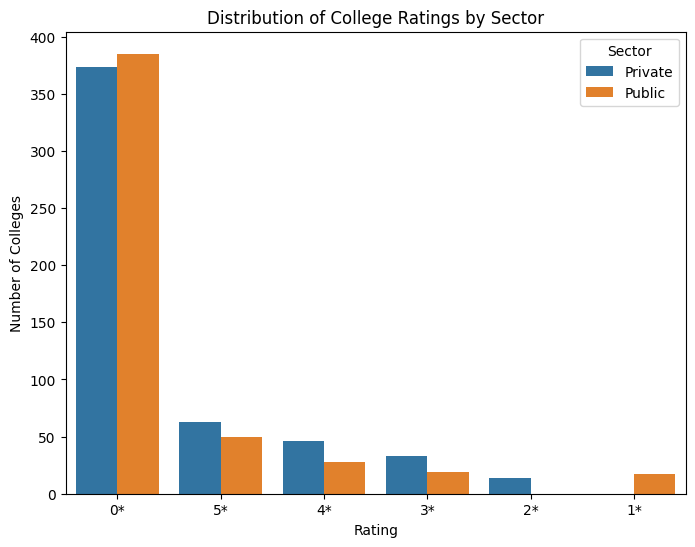

In [ ]:
-
sectorwise_top5 = df.groupby('Sector')['Rating'].value_counts().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='Rating', y='Count', hue='Sector', data=sectorwise_top5)
plt.xlabel('Rating')
plt.ylabel('Number of Colleges')
plt.title('Distribution of College Ratings by Sector')
plt.legend(title='Sector')
plt.show()